In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.metrics import  classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline 

In [7]:
import importlib
import ids_common
importlib.reload(ids_common)

SEED = random.randint(0, 42424242)
SEED = 42
print(f'SEED = {SEED}')

SEED = 42


In [3]:
df_orig = pd.read_csv('./samples_4_github/clean_ml_sample_balanced_2_class.csv', low_memory=False)

In [5]:
df_orig['Attack_label'].value_counts()

Attack_label
1    120223
0    120223
Name: count, dtype: int64

In [6]:
df_orig['Attack_type'].value_counts()

Attack_type
Normal                   120223
DDoS_UDP                  10000
Password                  10000
XSS                       10000
DDoS_ICMP                 10000
DDoS_TCP                  10000
SQL_injection             10000
Uploading                 10000
DDoS_HTTP                 10000
Backdoor                  10000
Port_Scanning             10000
Vulnerability_scanner     10000
Ransomware                 9141
OS_Fingerprinting           724
MITM                        358
Name: count, dtype: int64

In [9]:
df_train, df_test = ids_common.ds_split(df_orig, seed=42)

dataset = {}
dataset['2_class'] = {
    'train': ids_common.make_2_class(df_train),
    'test': ids_common.make_2_class(df_test)
}

dataset['14_class'] = {
    'train':ids_common.make_14_class(df_train),
    'test':ids_common.make_14_class(df_test)
}

dataset['15_class'] = {
    'train':ids_common.make_15_class(df_train),
    'test':ids_common.make_15_class(df_test)
}


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

DecisionTreeClassifier:
Train score: 0.966447628355757
Test score:  0.9647951757122063
TRAIN:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     96178
           1       1.00      0.93      0.97     96178

    accuracy                           0.97    192356
   macro avg       0.97      0.97      0.97    192356
weighted avg       0.97      0.97      0.97    192356

TEST:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     24045
           1       1.00      0.93      0.96     24045

    accuracy                           0.96     48090
   macro avg       0.97      0.96      0.96     48090
weighted avg       0.97      0.96      0.96     48090



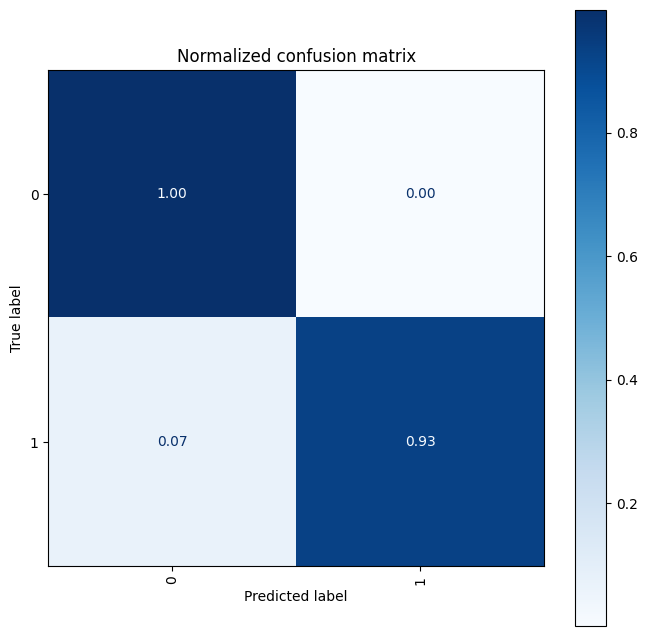

################################################################################


In [17]:
class_2 = DecisionTreeClassifier(
        **{'criterion': 'entropy', 'max_depth': 16}, random_state=SEED)

X_train, y_train = dataset['2_class']['train']
class_2.fit(X_train, y_train)

X_test, y_test = dataset['2_class']['test']

y_train_predict = class_2.predict(X_train)
y_test_predict = class_2.predict(X_test)

print(f'{class_2.__class__.__name__}:')
print(f'Train score: {class_2.score(X_train, y_train)}')
print(f'Test score:  {class_2.score(X_test, y_test)}')

ids_common.report(y_train, y_train_predict, y_test, y_test_predict)
ids_common.plot_cm(y_test, y_test_predict)

print('#'*80)

RandomForestClassifier:
Train score: 0.9999792052236478
Test score:  0.917238511124974
TRAIN:
                       precision    recall  f1-score   support

             Backdoor       1.00      1.00      1.00      8000
            DDoS_HTTP       1.00      1.00      1.00      8000
            DDoS_ICMP       1.00      1.00      1.00      8000
             DDoS_TCP       1.00      1.00      1.00      8000
             DDoS_UDP       1.00      1.00      1.00      8000
                 MITM       1.00      1.00      1.00       286
    OS_Fingerprinting       1.00      1.00      1.00       579
             Password       1.00      1.00      1.00      8000
        Port_Scanning       1.00      1.00      1.00      8000
           Ransomware       1.00      1.00      1.00      7313
        SQL_injection       1.00      1.00      1.00      8000
            Uploading       1.00      1.00      1.00      8000
Vulnerability_scanner       1.00      1.00      1.00      8000
                  XSS  

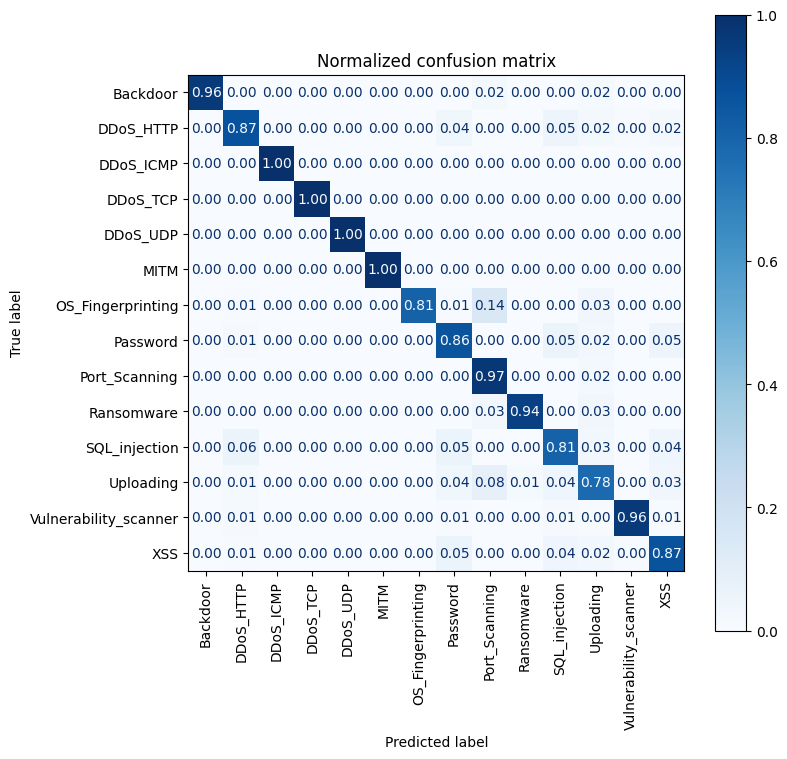

################################################################################


In [14]:
class_14 = RandomForestClassifier(
        **{'criterion': 'entropy', 'max_depth': 128, 'max_features': 'log2', 'n_estimators': 100},random_state=SEED)

X_train, y_train = dataset['14_class']['train']
class_14.fit(X_train, y_train)

X_test, y_test = dataset['14_class']['test']

y_train_predict = class_14.predict(X_train)
y_test_predict = class_14.predict(X_test)

print(f'{class_14.__class__.__name__}:')
print(f'Train score: {class_14.score(X_train, y_train)}')
print(f'Test score:  {class_14.score(X_test, y_test)}')

ids_common.report(y_train, y_train_predict, y_test, y_test_predict)
ids_common.plot_cm(y_test, y_test_predict)

print('#'*80)

RandomForestClassifier:
Train score: 0.9999896026118239
Test score:  0.9454772301933874
TRAIN:
                       precision    recall  f1-score   support

             Backdoor       1.00      1.00      1.00      8000
            DDoS_HTTP       1.00      1.00      1.00      8000
            DDoS_ICMP       1.00      1.00      1.00      8000
             DDoS_TCP       1.00      1.00      1.00      8000
             DDoS_UDP       1.00      1.00      1.00      8000
                 MITM       1.00      1.00      1.00       286
               Normal       1.00      1.00      1.00     96178
    OS_Fingerprinting       1.00      1.00      1.00       579
             Password       1.00      1.00      1.00      8000
        Port_Scanning       1.00      1.00      1.00      8000
           Ransomware       1.00      1.00      1.00      7313
        SQL_injection       1.00      1.00      1.00      8000
            Uploading       1.00      1.00      1.00      8000
Vulnerability_scanner 

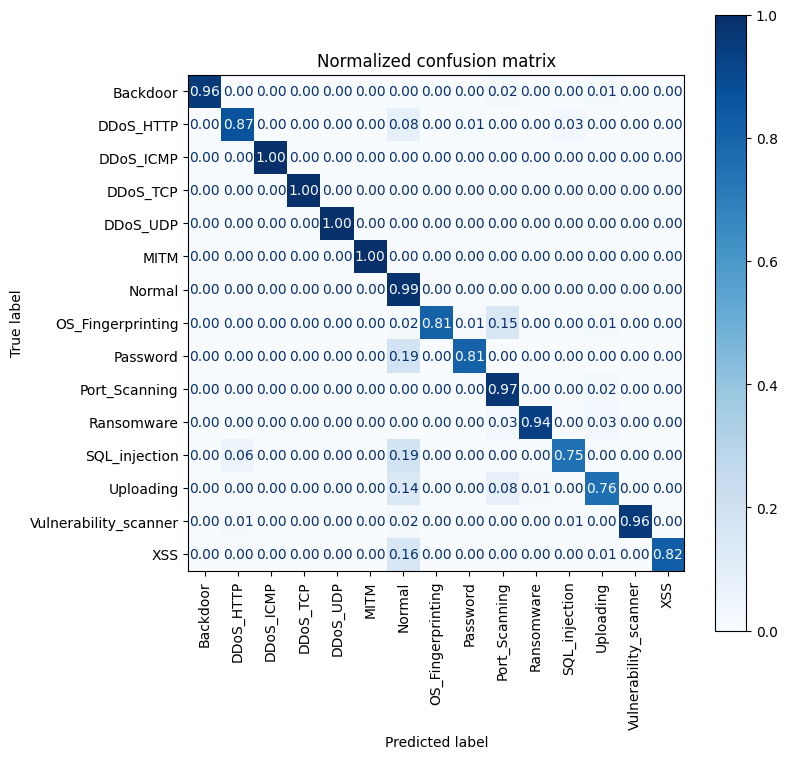

################################################################################


In [15]:
class_15 = RandomForestClassifier(
        **{'criterion': 'entropy', 'max_depth': 128, 'max_features': 'log2', 'n_estimators': 100},random_state=SEED)

X_train, y_train = dataset['15_class']['train']
class_15.fit(X_train, y_train)

X_test, y_test = dataset['15_class']['test']

y_train_predict = class_15.predict(X_train)
y_test_predict = class_15.predict(X_test)

print(f'{class_15.__class__.__name__}:')
print(f'Train score: {class_15.score(X_train, y_train)}')
print(f'Test score:  {class_15.score(X_test, y_test)}')

ids_common.report(y_train, y_train_predict, y_test, y_test_predict)
ids_common.plot_cm(y_test, y_test_predict)

print('#'*80)

DETECTION:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     24045
           1       1.00      0.93      0.96     24045

    accuracy                           0.96     48090
   macro avg       0.97      0.96      0.96     48090
weighted avg       0.97      0.96      0.96     48090



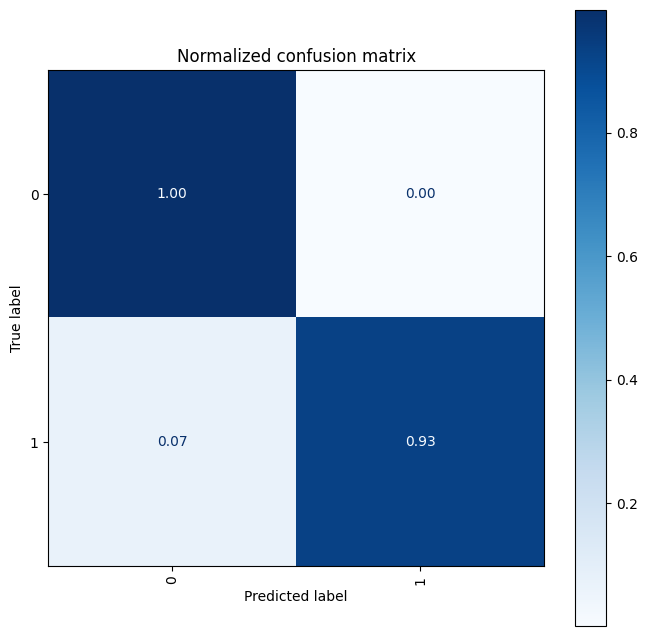

CLASSIFICATION:
                       precision    recall  f1-score   support

             Backdoor       1.00      1.00      1.00      1928
            DDoS_HTTP       1.00      1.00      1.00      1841
            DDoS_ICMP       1.00      1.00      1.00      2000
             DDoS_TCP       1.00      1.00      1.00      2001
             DDoS_UDP       1.00      1.00      1.00      2000
                 MITM       1.00      1.00      1.00        72
               Normal       1.00      1.00      1.00     25708
    OS_Fingerprinting       1.00      1.00      1.00       119
             Password       1.00      1.00      1.00      1643
        Port_Scanning       1.00      1.00      1.00      2209
           Ransomware       1.00      1.00      1.00      1745
        SQL_injection       1.00      1.00      1.00      1592
            Uploading       1.00      1.00      1.00      1644
Vulnerability_scanner       1.00      1.00      1.00      1937
                  XSS       1.00      

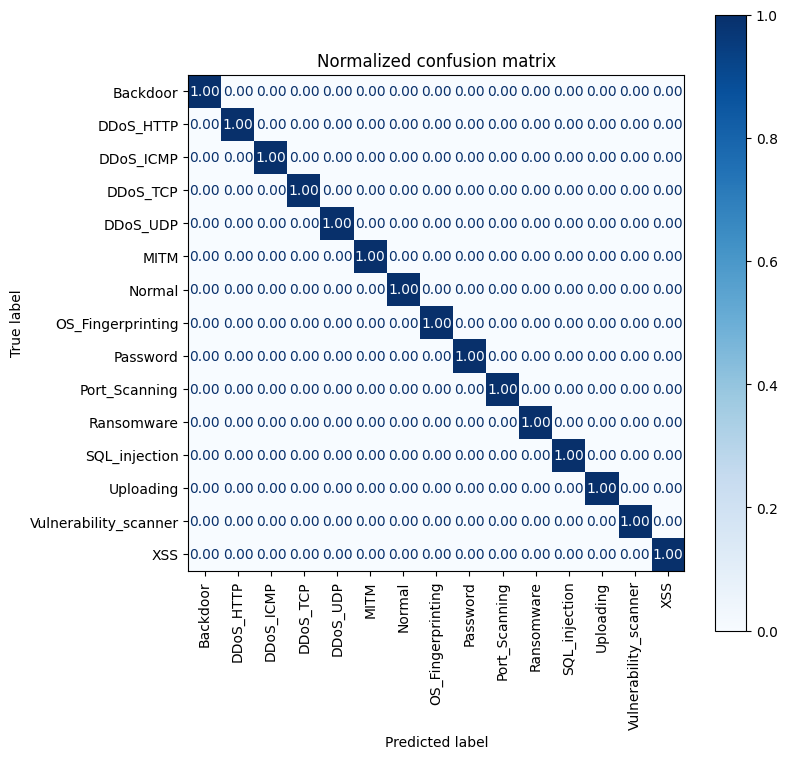

In [18]:
# combined detection with classification
y_class_2_test = df_test[ids_common.target_label_2_class]
y_class_15_predict = df_test[ids_common.target_label_15_class]

X_test = df_test.drop([ids_common.target_label_2_class, 
                  ids_common.target_label_15_class], 
                  axis=1, inplace=False)


y_class_2_predict = class_2.predict(X_test)

ds_class_14 = df_test[y_class_2_predict==1]
X_class_14 = ds_class_14.drop(
                [ids_common.target_label_2_class, 
                  ids_common.target_label_15_class], 
                  axis=1, inplace=False)

y_class_14_predict = class_14.predict(X_class_14)


y_class_15_predict = pd.Series(y_class_2_predict, index=X_test.index.copy())
y_class_15_predict = y_class_15_predict.map(lambda x: 'Normal' if x==0 else 'Attack')
y_class_15_predict.loc[X_class_14.index] = y_class_14_predict

print('DETECTION:')
print(classification_report(y_class_2_test, y_class_2_predict))
ids_common.plot_cm(y_class_2_test, y_class_2_predict)

print('CLASSIFICATION:')
print(classification_report(y_class_15_predict, y_class_15_predict))
ids_common.plot_cm(y_class_15_predict, y_class_15_predict)

